In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_excel(r"C:\Users\AryaDragneel\Desktop\Geojit\TCS OHLC.xlsx")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-06-07,3313.00,3327.00,3220.60,3250.00,4391297
1,2023-06-04,3355.00,3372.95,3265.15,3305.60,11790000
2,2023-05-28,3222.85,3339.00,3217.05,3328.90,7380000
3,2023-05-21,3280.50,3292.75,3195.00,3222.85,6410000
4,2023-05-14,3230.85,3309.70,3230.85,3274.30,6520000


In [ ]:
df = df.iloc[::-1]
df = df.set_index(pd.Index(range(len(df))))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2009-08-09,247.82,251.16,234.36,236.26,27350000
1,2009-08-16,243.64,258.95,236.93,242.01,54880000
2,2009-08-23,239.00,241.32,202.13,236.33,35650000
3,2009-08-30,240.39,262.67,238.33,250.97,40620000
4,2009-09-06,252.92,252.92,240.85,246.84,45760000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    723 non-null    datetime64[ns]
 1   Open    723 non-null    float64       
 2   High    723 non-null    float64       
 3   Low     723 non-null    float64       
 4   Close   723 non-null    float64       
 5   Volume  723 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.0 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,723.000000,723.000000,723.000000,723.000000,7.230000e+02
mean,1526.037303,1565.475159,1487.884219,1528.034633,1.478992e+07
std,993.264847,1014.367447,969.743323,992.059760,8.065639e+06
min,239.000000,241.320000,202.130000,236.260000,4.391297e+06
25%,639.300000,667.465000,626.515000,643.520000,1.001000e+07
50%,1210.800000,1237.150000,1185.260000,1208.350000,1.298000e+07
75%,2074.675000,2140.000000,2021.850000,2079.675000,1.758000e+07
max,4041.140000,4041.140000,3760.380000,3889.370000,1.087700e+08


In [ ]:
df["Date"]

0     2009-08-09
1     2009-08-16
2     2009-08-23
3     2009-08-30
4     2009-09-06
         ...    
718   2023-05-14
719   2023-05-21
720   2023-05-28
721   2023-06-04
722   2023-06-07
Name: Date, Length: 723, dtype: datetime64[ns]

In [ ]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df1 = df.tail(50)

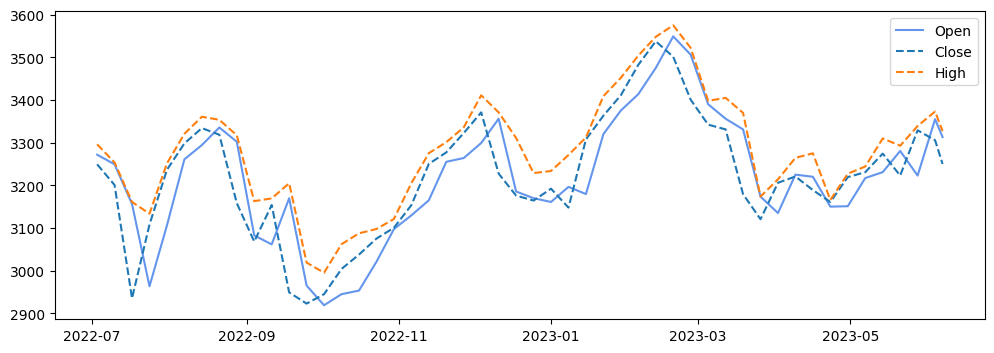

In [ ]:
plt.figure(figsize = (12,4))
plt.plot( df1["Date"], df1["Open"],color = "cornflowerblue")
plt.plot(  df1["Date"],df1["Close"], linestyle='--')
plt.plot(  df1["Date"],df1["High"], linestyle='--')
plt.legend(["Open","Close","High"])



<AxesSubplot: xlabel='Date', ylabel='Close'>

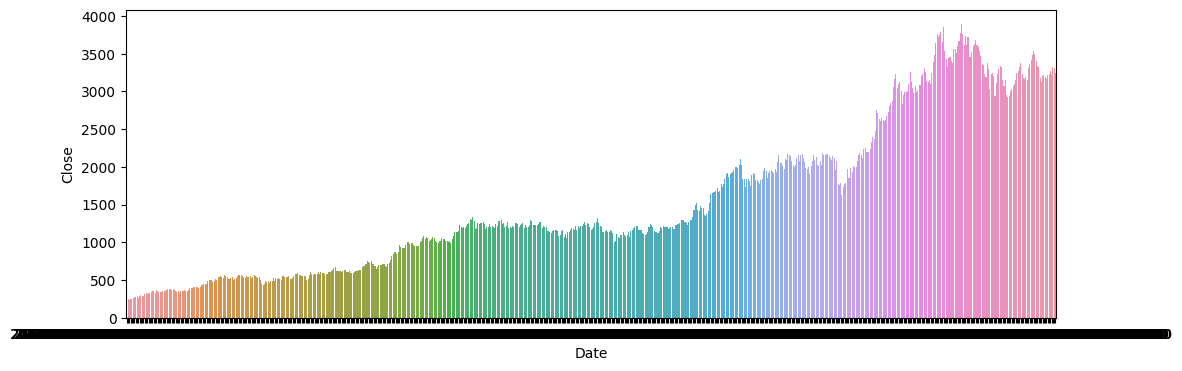

In [ ]:
plt.figure(figsize = (12,4))
sns.barplot(data = df, x = df["Date"], y = df["Close"])


In [ ]:
df.index = df.pop("Date")
df = df[["Close"]]

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j] - first) / first)
    temp2.append((df.iloc[i + window_size] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

496
125


In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
13/13 [==============================] - 11s 160ms/step - loss: 0.1442 - mse: 0.1442 - mae: 0.2966 - val_loss: 0.0484 - val_mse: 0.0484 - val_mae: 0.1853
Epoch 2/40
13/13 [==============================] - 0s 34ms/step - loss: 0.0542 - mse: 0.0542 - mae: 0.1912 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1611
Epoch 3/40
13/13 [==============================] - 0s 31ms/step - loss: 0.0343 - mse: 0.0343 - mae: 0.1498 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1316
Epoch 4/40
13/13 [==============================] - 0s 32ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1291 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1222
Epoch 5/40
13/13 [==============================] - 0s 32ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1285 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1247
Epoch 6/40
13/13 [==============================] - 0s 32ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1186 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1169
Epoch 7/40
13/13 [==

In [ ]:
train_X.shape

(496, 1, 100, 1)

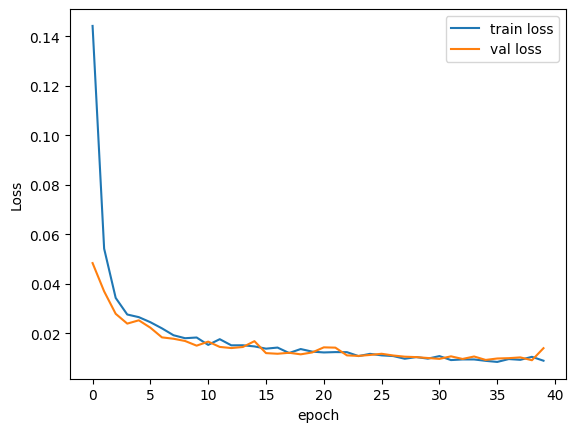

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

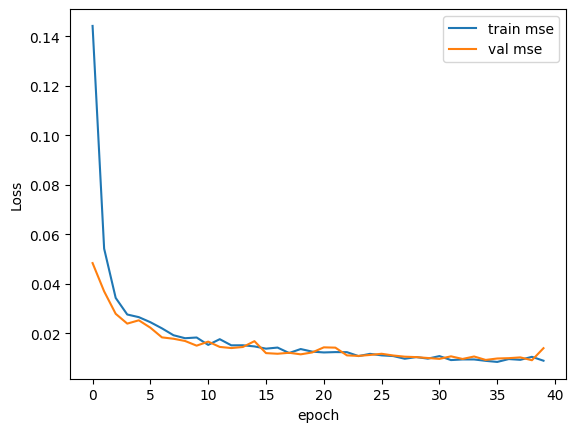

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

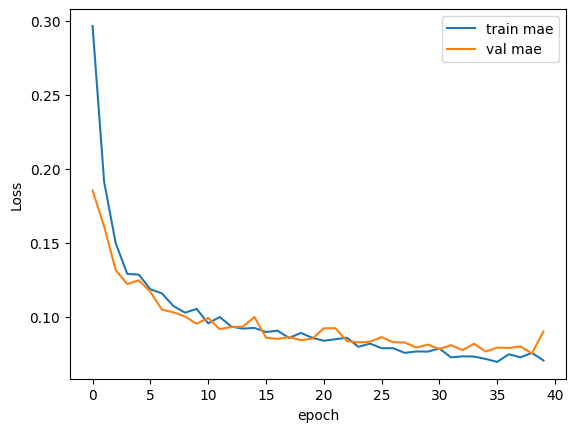

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:


# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:


model.evaluate(test_X, test_Y)



4/4 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0901


[0.013961957767605782, 0.013961957767605782, 0.09010496735572815]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.907263
R2 Score: 0.907263
Max Error: 0.409791


4/4 [==============================] - 0s 7ms/step


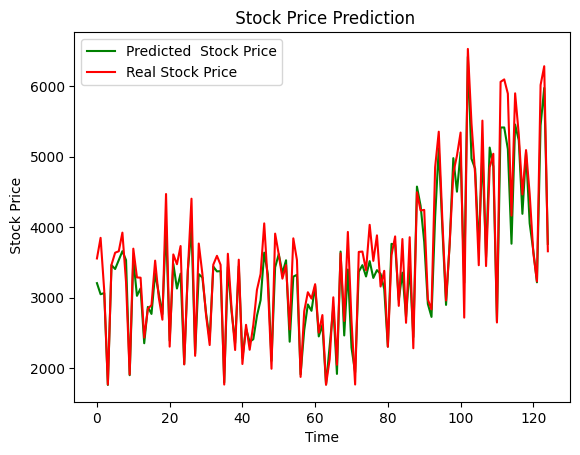

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

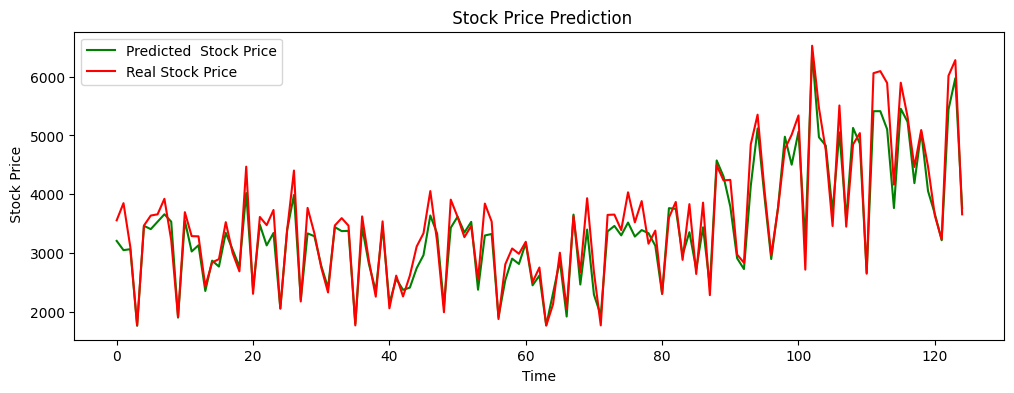

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()